# Author

- Daniel Soto

# Introduction

The purpose of this notebook is to estimate the fuel consumption rate of diesel generators at very low loads.

# Method

We assume a linear relationship between load and fuel consumption and fit.

$$ fuel\ rate = m \cdot power + b $$

Dividing the fuel rate by power has dimensions of volume per energy (in this case, kVA-hour), which is related to heat rate.

$$ \frac{fuel\ rate}{power} = \frac{volume}{time}\frac{time}{energy} = \frac{volume}{energy}$$

Dividing the linear relationship both sides by power gives

$$ volume\ energy\ rate = m + \frac{b}{power} $$

We produce linear fits and generator curves for Kohler generators of the same size as the Sentani microgrid gensets.

# Results

There is a substantial heat-rate penalty as the loads go below 5 kVA.
The mean loads in Atamali and Kensio are below 3 kVA.

# Next Work

Using these curves, we can create a heat-rate duration curve from the measured load data.
I can then extend to create price-duration curves for each microgrid.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import WP19_analysis as wpa
import numpy as np

In [3]:
generators = [{'model':'20REOZK',
               'rated_load_kVA':25.0,
               'load_fraction':[0.25, 0.50, 0.75, 1.0],
               'liters_per_hour':[2.3, 3.8, 5.7, 7.2]},
              {'model':'30REOZK',
               'rated_load_kVA':35.0,
               'load_fraction':[0.25, 0.50, 0.75, 1.0],
               'liters_per_hour':[3.0, 5.3, 7.2, 9.1]},
              {'model':'40REOZK',
               'rated_load_kVA':45.0,
               'load_fraction':[0.25, 0.50, 0.75, 1.0],
               'liters_per_hour':[3.5, 6.1, 8.8, 11.7]}
             ]

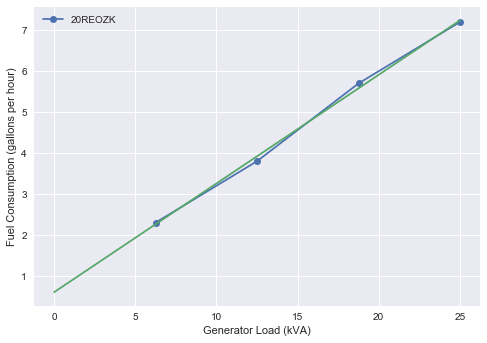

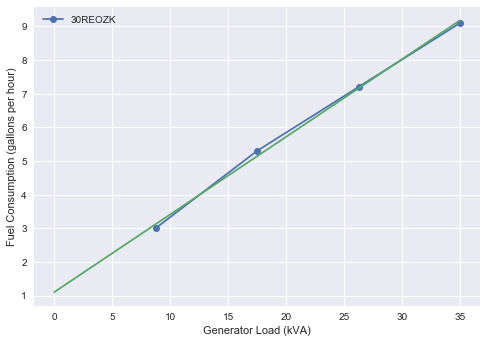

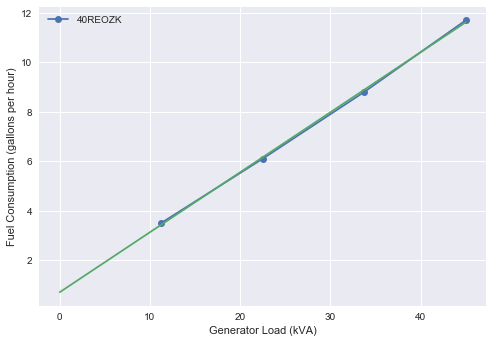

In [4]:
for g in generators:
    load = np.array(g['load_fraction']) * g['rated_load_kVA']

    fit = np.polyfit(load,
              g['liters_per_hour'],
              1)
    x = np.linspace(0, 1, 2) * g['rated_load_kVA']
    y = np.polyval(fit, x)

    plt.plot(load, 
             g['liters_per_hour'],
             marker='o',
            label=g['model'])
    plt.plot(x, y)

    plt.legend()
    plt.xlabel('Generator Load (kVA)')
    plt.ylabel('Fuel Consumption (gallons per hour)')
    plt.show()

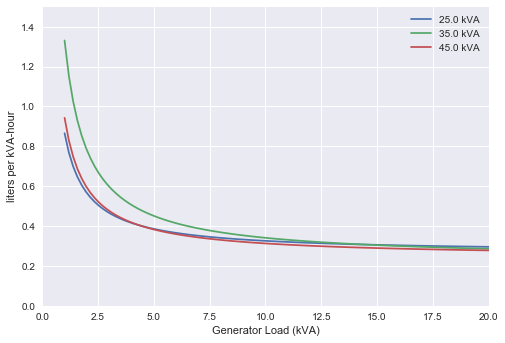

In [5]:
for g in generators:
    fit = np.polyfit(np.array(g['load_fraction']) * g['rated_load_kVA'],
                     g['liters_per_hour'],
                     1)

    load = np.linspace(0.05, 1.0, 100) * 20.0
    hours = 1.0
    load_hours = load * hours
    fuel_rate = np.polyval(fit, load)
    fuel = fuel_rate * hours
    heat_rate = fuel / load_hours
    plt.plot(load, heat_rate, label=str(g['rated_load_kVA'])+' kVA')
    
plt.xlim((0, 20))
plt.ylim((0, 1.5))
plt.legend()
plt.xlabel('Generator Load (kVA)')
plt.ylabel('liters per kVA-hour')
plt.show()